In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

print(sys.version)

3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [4]:
_logdir = "tensorboard_logs"

In [65]:
run1 = pd.read_csv(_logdir+"/run1_kitti.csv",usecols=["Step","Value"])
run1_s = pd.ewma(run1,10)
run2 =  pd.read_csv(_logdir+"/run2_bn.csv",usecols=["Step","Value"])
ft = pd.read_csv(_logdir+"/ft-sintel.csv",usecols=["Step","Value"])
ft_s = pd.ewma(ft,100)

/home/bruno/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,ignore_na=False,adjust=True,com=10).mean()
  from ipykernel import kernelapp as app
/home/bruno/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,ignore_na=False,adjust=True,com=100).mean()


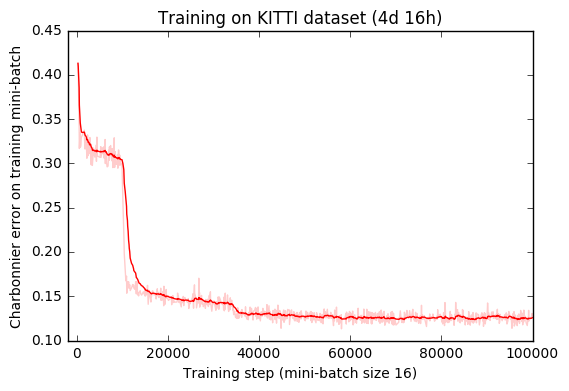

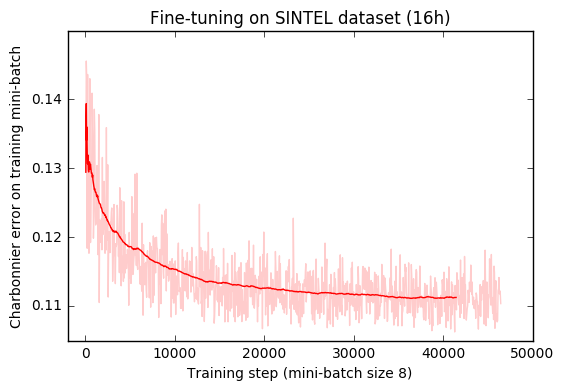

In [69]:
plt.figure()
plt.plot(run1["Step"],run1["Value"],'r-', alpha=0.2)
plt.plot(run1["Step"],run1_s["Value"],'r-')
plt.xlim(-2000,100000)
plt.xlabel("Training step (mini-batch size 16)")
plt.ylabel("Charbonnier error on training mini-batch")
plt.title("Training on KITTI dataset (4d 16h)")
plt.show()

plt.figure()
plt.plot(ft["Step"],ft["Value"],'r-', alpha=0.2)
plt.plot(ft_s["Step"],ft_s["Value"],'r-')
plt.xlim(-2000,50000)
plt.xlabel("Training step (mini-batch size 8)")
plt.ylabel("Charbonnier error on training mini-batch")
plt.title("Fine-tuning on SINTEL dataset (16h)")
plt.show()